In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from IPython.display import Audio
sound_file = './beep-01a.wav'

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test_v2.csv')

In [3]:
np.unique(train_data.columns)

array(['A', 'B', 'C', 'C_previous', 'D', 'E', 'F', 'G', 'age_oldest',
       'age_youngest', 'car_age', 'car_value', 'cost', 'customer_ID',
       'day', 'duration_previous', 'group_size', 'homeowner', 'location',
       'married_couple', 'record_type', 'risk_factor', 'shopping_pt',
       'state', 'time'], dtype=object)

In [4]:
quotes_non_purchase = train_data[train_data.record_type == 0].reset_index(drop=True)
quotes_purchase = train_data[train_data.record_type == 1].reset_index(drop=True)
quotes_bf_purchase = quotes_non_purchase.iloc[quotes_non_purchase.groupby('customer_ID').shopping_pt.idxmax()].reset_index(drop=True)

In [5]:
letters = 'ABCDEFG'
quotes_diff_list = []
for index, row in quotes_bf_purchase.iterrows():
    #print index
    different = False
    for char in letters:
        #print quotes_purchase.iloc[index][char]
        try:
            if row[char] != quotes_purchase.iloc[index][char]:
                #print row[char]
                # It means that the quote on purchase is different from the last quote before purchase
                quotes_diff_list.append(1)
                different = True
                break
        except IndexError:
            print index
            raise
    if not different:
        quotes_diff_list.append(0)
#pd.DataFrame(quotes_diff_list, columns=quotes_bf_purchase.columns)
#quotes_bf_purchase = quotes_bf_purchase.append(pd.Series(quotes_diff_list), axis=0)

In [6]:
quotes_bf_purchase['different_quote'] = pd.Series(quotes_diff_list)

In [7]:
quotes_bf_purchase.head()

,customer_ID,shopping_pt,record_type,day,time,state,location,group_size,homeowner,car_age,...,duration_previous,A,B,C,D,E,F,G,cost,different_quote
0,10000000,8,0,0,12:03,IN,10001,2,0,2,...,2.0,1,0,2,2,1,2,1,638,0
1,10000005,5,0,3,08:58,NY,10006,1,0,10,...,13.0,0,0,3,2,0,0,2,731,0
2,10000007,7,0,4,08:43,PA,10008,1,0,11,...,4.0,0,0,2,2,0,0,1,605,1
3,10000013,3,0,2,16:36,WV,10014,2,1,3,...,3.0,1,1,3,2,1,1,3,627,0
4,10000014,5,0,4,16:43,MO,10015,1,0,5,...,2.0,1,1,1,1,0,2,2,603,0


In [8]:
#quotes_diff = pd.DataFrame(quotes_diff_list, columns=quotes_bf_purchase.columns)
#quotes_nodiff = quotes_bf_purchase.loc[~quotes_bf_purchase.index.isin(quotes_diff.index)]
quotes_diff = quotes_bf_purchase[quotes_bf_purchase.different_quote == 1]
quotes_nodiff = quotes_bf_purchase[quotes_bf_purchase.different_quote == 0]

In [9]:
print len(quotes_diff), len(quotes_nodiff)

30277 66732


In [107]:
print float(len(quotes_diff)) / (len(quotes_nodiff) + len(quotes_diff))
overall_P_diff_quote = float(len(quotes_diff)) / (len(quotes_nodiff) + len(quotes_diff))

0.312105062417


### Successfully created a dataframe of purchases that did not change from the last quote, and purchases that change from the last quote.

#### In the following steps I will visualize the differences between purchases that changed from the last quote and those that did not

In [22]:
# Before I do that, I will want to fill the empty values

# This function finds out what columns have empty values
def any_null(series):
    return any(series.isnull())
'''
print "Different Quotes"
print quotes_diff.apply(any_null)
print "\nSame Quotes"
print quotes_nodiff.apply(any_null)
'''

# This function finds out the percentage of empty values in a series
def empty_percentage(series):
    return (len(series) - len(series.dropna())) / float(len(series.dropna()))
print "Different Quotes"
print quotes_diff.apply(empty_percentage)
print "\nSame Quotes"
print quotes_nodiff.apply(empty_percentage)


Different Quotes
customer_ID          0.000000
shopping_pt          0.000000
record_type          0.000000
day                  0.000000
time                 0.000000
state                0.000000
location             0.000000
group_size           0.000000
homeowner            0.000000
car_age              0.000000
car_value            0.002384
risk_factor          0.585598
age_oldest           0.000000
age_youngest         0.000000
married_couple       0.000000
C_previous           0.032922
duration_previous    0.032922
A                    0.000000
B                    0.000000
C                    0.000000
D                    0.000000
E                    0.000000
F                    0.000000
G                    0.000000
cost                 0.000000
different_quote      0.000000
dtype: float64

Same Quotes
customer_ID          0.000000
shopping_pt          0.000000
record_type          0.000000
day                  0.000000
time                 0.000000
state                0.00

In [25]:
# Fill empty 'duration previous' with zero
quotes_bf_purchase['duration_previous'].dropna().astype(int)
#np.unique(quotes_bf_purchase['duration_previous'])

0         2
1        13
2         4
3         3
4         2
5         9
6         4
7        13
8         0
9         1
10        1
11        2
12        8
13       14
14        5
15        3
16       15
17        5
18        0
19        4
20        5
21        4
22       15
23        4
24        6
25        1
26        7
27        3
28        3
29       15
         ..
96979     9
96980    11
96981     4
96982    15
96983    15
96984     0
96985     7
96986     7
96987     1
96988     4
96989     5
96990     9
96991     1
96992     0
96993     1
96994     4
96995    15
96996     2
96997    10
96998     2
96999     2
97000    12
97001    15
97002     6
97003     4
97004    13
97005     8
97006     5
97007     2
97008     4
Name: duration_previous, dtype: int32

In [33]:
quotes_diff.groupby('shopping_pt').count()

,customer_ID,record_type,day,time,state,location,group_size,homeowner,car_age,car_value,...,C_previous,duration_previous,A,B,C,D,E,F,G,cost
shopping_pt,,,,,,,,,,,,,,,,,,,,,
2,2799,2799,2799,2799,2799,2799,2799,2799,2799,2786,...,2622,2622,2799,2799,2799,2799,2799,2799,2799,2799
3,3193,3193,3193,3193,3193,3193,3193,3193,3193,3185,...,3057,3057,3193,3193,3193,3193,3193,3193,3193,3193
4,3916,3916,3916,3916,3916,3916,3916,3916,3916,3908,...,3801,3801,3916,3916,3916,3916,3916,3916,3916,3916
5,4978,4978,4978,4978,4978,4978,4978,4978,4978,4971,...,4860,4860,4978,4978,4978,4978,4978,4978,4978,4978
6,5359,5359,5359,5359,5359,5359,5359,5359,5359,5346,...,5225,5225,5359,5359,5359,5359,5359,5359,5359,5359
7,4704,4704,4704,4704,4704,4704,4704,4704,4704,4692,...,4569,4569,4704,4704,4704,4704,4704,4704,4704,4704
8,3077,3077,3077,3077,3077,3077,3077,3077,3077,3071,...,2994,2994,3077,3077,3077,3077,3077,3077,3077,3077
9,1578,1578,1578,1578,1578,1578,1578,1578,1578,1575,...,1534,1534,1578,1578,1578,1578,1578,1578,1578,1578
10,537,537,537,537,537,537,537,537,537,536,...,521,521,537,537,537,537,537,537,537,537


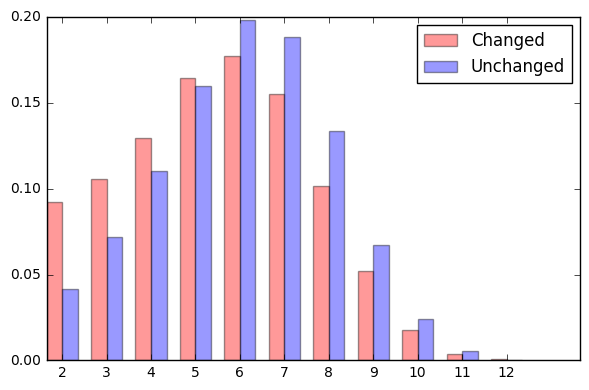

In [44]:
# Visualization of shopping pt
groupedby_shoppingpt_diffquotes = quotes_diff.groupby('shopping_pt').count().customer_ID / float(len(quotes_diff))
groupedby_shoppingpt_nodiffquotes = quotes_nodiff.groupby('shopping_pt').count().customer_ID / float(len(quotes_nodiff))

n_groups = len(np.unique(quotes_bf_purchase.shopping_pt))
index = np.arange(n_groups)
opacity=0.4

bar_width = 0.35
plt.bar(index, groupedby_shoppingpt_diffquotes, bar_width,
        alpha=opacity,
        color='r',
        label='Changed')
plt.bar(index + bar_width, groupedby_shoppingpt_nodiffquotes, bar_width,
        alpha=opacity,
        color='b',
        label='Unchanged')

plt.legend()
plt.xticks(index + bar_width, sorted(np.unique(quotes_bf_purchase.shopping_pt)))
plt.tight_layout()
plt.show()

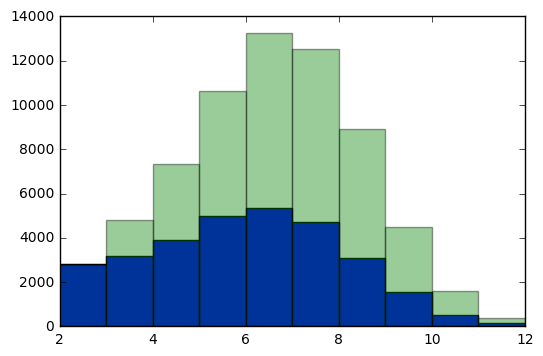

In [97]:
plt.hist(quotes_diff.shopping_pt)
plt.hist(quotes_nodiff.shopping_pt, alpha=0.4)
plt.show()

In [65]:
quotes_diff.loc['different_quote'] = 1
quotes_nodiff.loc['different_quote'] = 0
quotes_combined = quotes_diff.append(quotes_nodiff)
quotes_combined = quotes_combined.sort_values('customer_ID')

D:\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [98]:
quotes_combined.different_quote.var()

0.21469916124926128

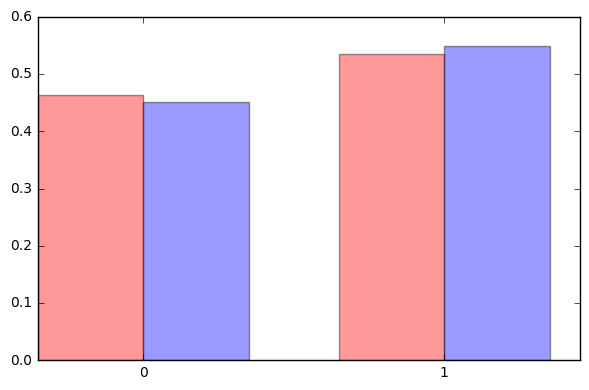

In [180]:
# Visualization of homeowner
groupedby_homeowner_diffquotes = quotes_diff.groupby('homeowner').count().customer_ID / float(len(quotes_diff))
groupedby_homeowner_nodiffquotes = quotes_nodiff.groupby('homeowner').count().customer_ID / float(len(quotes_nodiff))

n_groups = len(np.unique(quotes_bf_purchase.homeowner))
index = np.arange(n_groups)
opacity=0.4

bar_width = 0.35
plt.bar(index, groupedby_homeowner_diffquotes, bar_width,
        alpha=opacity,
        color='r',
        label='Changed')
plt.bar(index + bar_width, groupedby_homeowner_nodiffquotes, bar_width,
        alpha=opacity,
        color='b',
        label='Unchanged')

#plt.legend()
plt.xticks(index + bar_width, sorted(np.unique(quotes_bf_purchase.homeowner)))
plt.tight_layout()
plt.show()

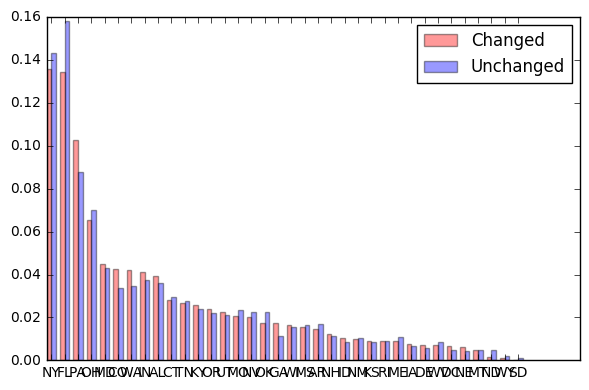

In [79]:
# Visualization of states
groupedby_state_diffquotes = quotes_bf_purchase[quotes_bf_purchase.different_quote == 1].groupby('state').count().customer_ID.sort_values(ascending=False) / float(len(quotes_diff))
groupedby_state_nodiffquotes = quotes_bf_purchase[quotes_bf_purchase.different_quote == 0].groupby('state').count().customer_ID[groupedby_state_diffquotes.index] / float(len(quotes_nodiff))

n_groups = len(np.unique(quotes_bf_purchase.state))
index = np.arange(n_groups)
opacity=0.4

bar_width = 0.35
plt.bar(index, groupedby_state_diffquotes, bar_width,
        alpha=opacity,
        color='r',
        label='Changed')
plt.bar(index + bar_width, groupedby_state_nodiffquotes, bar_width,
        alpha=opacity,
        color='b',
        label='Unchanged')

plt.legend()
plt.xticks(index + bar_width, groupedby_state_diffquotes.index)
plt.tight_layout()
plt.show()

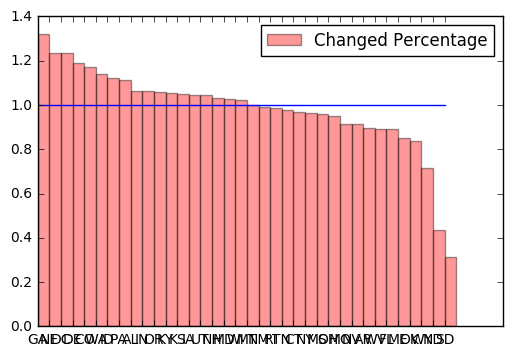

In [182]:
groupedby_state_diffquotes = quotes_bf_purchase[quotes_bf_purchase.different_quote == 1].groupby('state').count().customer_ID
groupedby_state_all = quotes_bf_purchase.groupby('state').count().customer_ID
groupedby_state_diff_ratio = groupedby_state_diffquotes / groupedby_state_all
groupedby_state_diff_ratio = groupedby_state_diff_ratio.sort_values(ascending=False)
n_groups = len(groupedby_state_diff_ratio.index)
index = np.arange(n_groups)
hoz_line = [quotes_diff_pct / overall_P_diff_quote for i in index]
opacity=0.4
bar_width = 1
plt.bar(index, groupedby_state_diff_ratio.values / overall_P_diff_quote, bar_width, alpha=opacity, color='r', label='Changed Percentage')
plt.plot(index, hoz_line)
plt.legend()
plt.xticks(index+bar_width/2, groupedby_state_diff_ratio.index)
plt.show()

#### There seems to be a significant relationship between the state and changing options from the last quote

In [68]:
# Next, the hour. First we want to change the time column to hours by the 24-hour format
quotes_bf_purchase['hour'] = pd.to_datetime(quotes_bf_purchase.time).dt.hour

In [70]:
groupedby_hour = quotes_bf_purchase.groupby('hour').count().customer_ID

In [71]:
groupedby_hour_changed = quotes_bf_purchase[quotes_bf_purchase.different_quote == 1].groupby('hour').count().customer_ID.reindex(groupedby_hour.index).fillna(0)

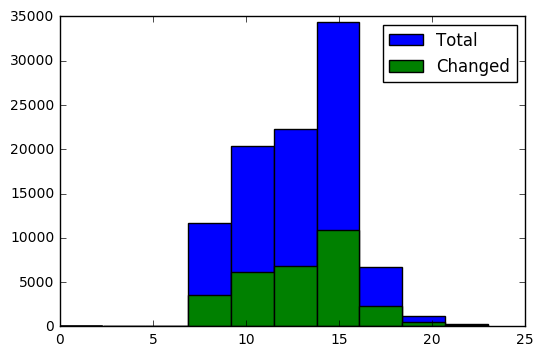

In [72]:
plt.hist(quotes_bf_purchase.hour, label='Total')
plt.hist(quotes_bf_purchase.hour[quotes_bf_purchase.different_quote == 1], label='Changed')
plt.legend()
plt.show()

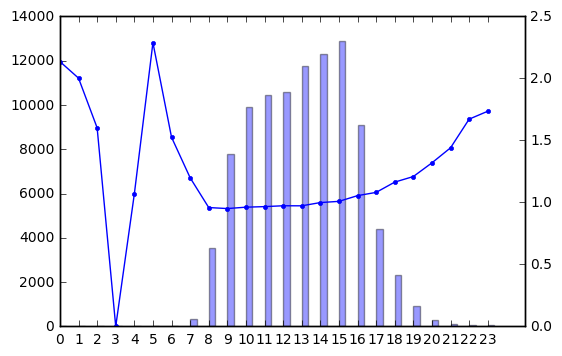

In [77]:
fig, ax1 = plt.subplots()

#n_groups = np.array(groupedby_hour.index)
index = np.array(groupedby_hour.index)
bar_width = 0.35
opacity=0.4
ax1.bar(index, groupedby_hour, bar_width, alpha=opacity)

groupedby_hour_changed_ratio = (groupedby_hour_changed / groupedby_hour) / quotes_diff_pct
ax2 = ax1.twinx()
ax2.plot(groupedby_hour_changed_ratio, '.-')
plt.xticks(index)
plt.show()

In [78]:
groupedby_hour_changed_ratio

hour
0     2.136033
1     2.002531
2     1.602025
3     0.000000
4     1.068016
5     2.288607
6     1.525738
7     1.199230
8     0.958784
9     0.950733
10    0.961797
11    0.966301
12    0.973221
13    0.972804
14    0.998989
15    1.008747
16    1.054769
17    1.081076
18    1.163987
19    1.208879
20    1.319314
21    1.440580
22    1.671678
23    1.735527
Name: customer_ID, dtype: float64

#### Hours can be a factor behind whether the customer purchases a changing quote from the last quote. Even though it does not provide us with significant information on whether someone will change the quote, it can provide us credible information that a customer is less likely to change the quote during daytime, namely from 7 to 19. 

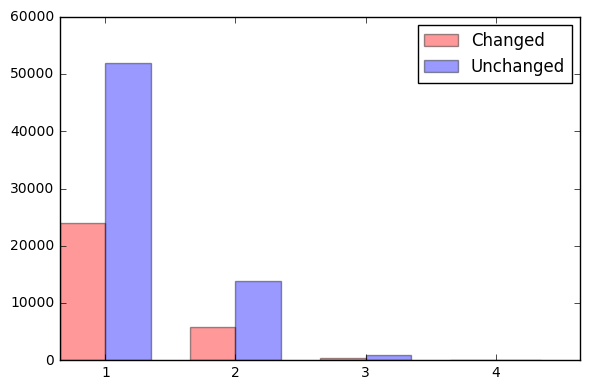

In [57]:
# Now, group size!
# First see the options for groupsizes:
sorted(np.unique(quotes_bf_purchase.group_size))

# Visualization of group size
# Visualization of homeowner
groupedby_groupsize_diffquotes = quotes_bf_purchase[quotes_bf_purchase.different_quote == 1].groupby('group_size').count().customer_ID
groupedby_groupsize_samequotes = quotes_bf_purchase[quotes_bf_purchase.different_quote == 0].groupby('group_size').count().customer_ID
groupedby_groupsize_all = quotes_bf_purchase.groupby('group_size').count().customer_ID

n_groups = len(groupedby_groupsize_diffquotes.index)
index = np.array(groupedby_groupsize_diffquotes.index)
opacity=0.4

bar_width = 0.35
plt.bar(index, groupedby_groupsize_diffquotes, bar_width,
        alpha=opacity,
        color='r',
        label='Changed')
plt.bar(index + bar_width, groupedby_groupsize_samequotes, bar_width,
        alpha=opacity,
        color='b',
        label='Unchanged')

plt.legend()
plt.xticks(index + bar_width, index)
plt.tight_layout()
plt.show()

In [59]:
groupedby_groupsize_diffquotes/groupedby_groupsize_all

group_size
1    0.315592
2    0.299691
3    0.298921
4    0.288462
Name: customer_ID, dtype: float64

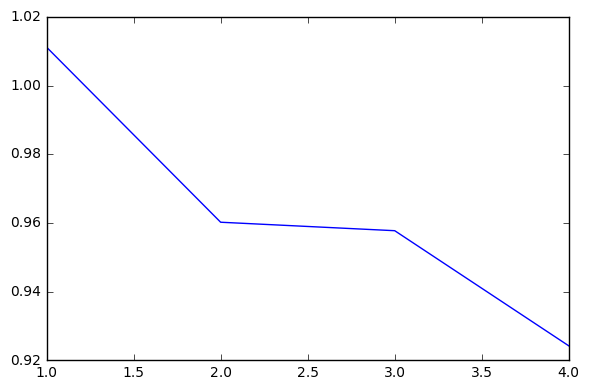

In [58]:
# A clearer visualization: Ratio of different quotes to same quotes
#plt.bar(index, groupedby_groupsize_diffquotes / groupedby_groupsize_samequotes, bar_width)
#plt.xticks(index + bar_width/2, index)
plt.plot((groupedby_groupsize_diffquotes/groupedby_groupsize_all) / (len(quotes_bf_purchase[quotes_bf_purchase.different_quote == 1])/float(len(quotes_bf_purchase))))
plt.tight_layout()
plt.show()

#### There is a small relationship between group size and quote difference. The larger the group size, the less likely it is for quotes to change

## Meanwhile, it sounds a good choice to group group sizes 2 and 3 to one group: Maybe: Couple and Small families

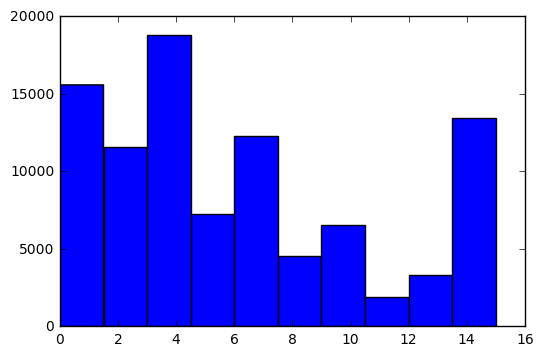

In [26]:
# Next, duration previous
plt.hist(quotes_bf_purchase['duration_previous'].dropna().astype(int))
plt.show()


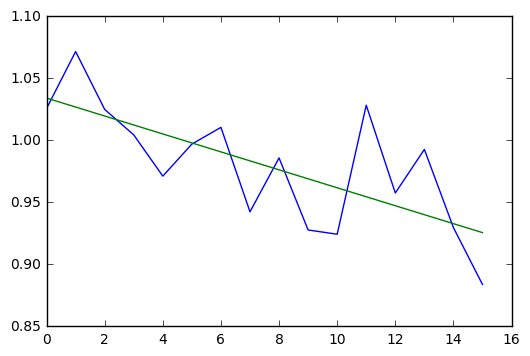

-0.698409275


In [180]:
groupby_durationprev_diff = quotes_bf_purchase[(quotes_bf_purchase.different_quote == 1) & (quotes_bf_purchase['duration_previous'].notnull())].groupby('duration_previous').count().customer_ID
groupby_durationprev = quotes_bf_purchase[quotes_bf_purchase['duration_previous'].notnull()].groupby('duration_previous').count().customer_ID

durationprev_diff_pct = groupby_durationprev_diff / groupby_durationprev
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(np.array(durationprev_diff_pct.index).reshape(-1, 1), durationprev_diff_pct.values.reshape(-1,1))

x = np.arange(len(durationprev_diff_pct.index)).reshape(-1,1)
y = lr.predict(x)

plt.plot(durationprev_diff_pct / overall_P_diff_quote)
plt.plot(y / overall_P_diff_quote)
plt.show()
print np.corrcoef(np.array(durationprev_diff_pct.index), durationprev_diff_pct.values)[0, 1]

### There seems to be a negative near-linear relationship between the chance of change and the previous duration

### Next Step: day

In [90]:
groupedby_day

day
0    20780
1    20177
2    19610
3    17661
4    17450
5     1189
6      142
Name: customer_ID, dtype: int64

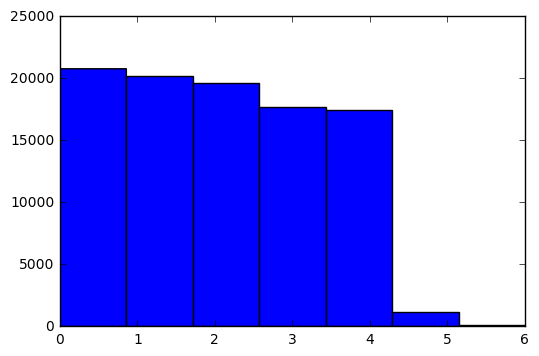

In [110]:
plt.hist(quotes_bf_purchase.day, bins=7)
plt.show()

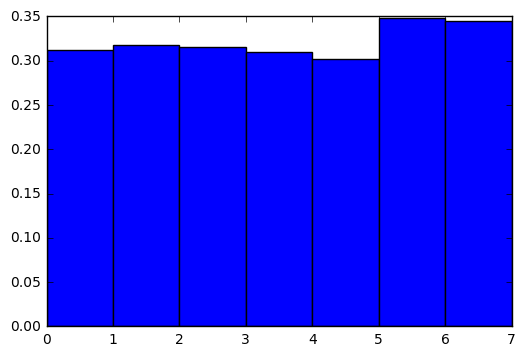

In [99]:
groupedby_day_changed = quotes_bf_purchase[quotes_bf_purchase.different_quote == 1].groupby('day').count().customer_ID
groupedby_day = quotes_bf_purchase.groupby('day').count().customer_ID
n_days = len(groupedby_day)
index = np.arange(n_days)
bar_width=1
plt.bar(index, groupedby_day_changed / groupedby_day, bar_width)
#plt.hist(quotes_bf_purchase.day, bins=7)
#plt.xticks(groupedby_day.index)
plt.show()

### On the weekends it seems that there is a higher range of change, but there are very few quotes on weekends. Perhaps we could create a variable called "weekend" and make that a factor

In [104]:
def is_weekend(day):
    if day < 5:
        return 0
    else:
        return 1
quotes_bf_purchase['weekend'] = quotes_bf_purchase.day.apply(is_weekend)
#quotes_bf_purchase.day.apply(is_weekend)

In [105]:
groupedby_weekend

weekend
0    20780
1    20177
2    19610
3    17661
4    17450
5     1189
6      142
Name: customer_ID, dtype: int64

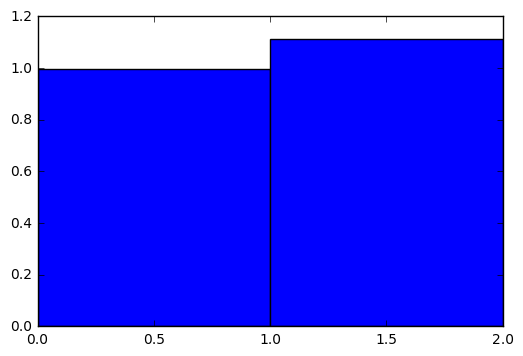

In [108]:
# Visualize again
groupedby_weekend_changed = quotes_bf_purchase[quotes_bf_purchase.different_quote == 1].groupby('weekend').count().customer_ID
groupedby_weekend = quotes_bf_purchase.groupby('weekend').count().customer_ID
n_days = len(groupedby_weekend)
index = np.arange(n_days)
bar_width=1
plt.bar(index, (groupedby_weekend_changed / groupedby_weekend) / overall_P_diff_quote , bar_width)
#plt.hist(quotes_bf_purchase.day, bins=7)
#plt.xticks(groupedby_day.index)
plt.show()

### Comment: Quotes have about 10% higher chance to change on weekends. We could leverage this

### Next Step: Age!

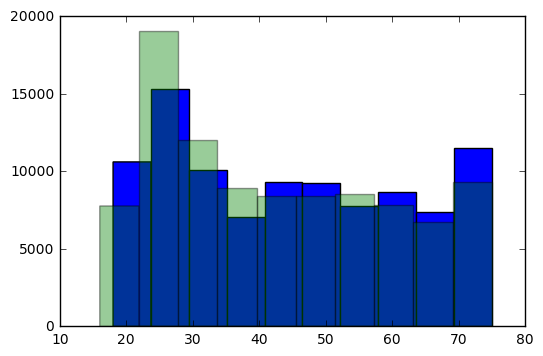

In [113]:
# Visualize age
plt.hist(quotes_bf_purchase.age_oldest)
plt.hist(quotes_bf_purchase.age_youngest, alpha=0.4)
plt.show()

In [128]:
quotes_bf_purchase.groupby(['age_youngest', 'age_oldest']).size().unstack().fillna(0)

age_oldest,18,19,20,21,22,23,24,25,26,27,...,66,67,68,69,70,71,72,73,74,75
age_youngest,,,,,,,,,,,,,,,,,,,,,
16,0.0,1.0,1.0,1.0,1.0,4.0,0.0,0.0,2.0,3.0,...,3.0,2.0,2.0,3.0,1.0,3.0,0.0,0.0,2.0,5.0
17,9.0,2.0,0.0,0.0,2.0,0.0,0.0,1.0,1.0,1.0,...,3.0,2.0,2.0,1.0,2.0,0.0,1.0,2.0,1.0,0.0
18,219.0,7.0,7.0,4.0,4.0,1.0,1.0,1.0,0.0,0.0,...,2.0,2.0,2.0,4.0,4.0,5.0,1.0,3.0,2.0,10.0
19,0.0,944.0,19.0,13.0,22.0,7.0,3.0,3.0,3.0,4.0,...,2.0,7.0,3.0,5.0,3.0,2.0,2.0,1.0,1.0,6.0
20,0.0,0.0,1440.0,37.0,37.0,18.0,15.0,6.0,3.0,5.0,...,4.0,6.0,1.0,0.0,0.0,1.0,1.0,1.0,2.0,7.0
21,0.0,0.0,0.0,1996.0,53.0,37.0,35.0,13.0,14.0,7.0,...,1.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,0.0,8.0
22,0.0,0.0,0.0,0.0,2709.0,71.0,33.0,23.0,10.0,15.0,...,5.0,4.0,1.0,4.0,3.0,3.0,0.0,1.0,2.0,10.0
23,0.0,0.0,0.0,0.0,0.0,2949.0,90.0,57.0,31.0,21.0,...,2.0,3.0,1.0,4.0,1.0,2.0,0.0,1.0,0.0,4.0
24,0.0,0.0,0.0,0.0,0.0,0.0,2919.0,89.0,46.0,35.0,...,2.0,0.0,1.0,1.0,3.0,1.0,0.0,1.0,1.0,3.0


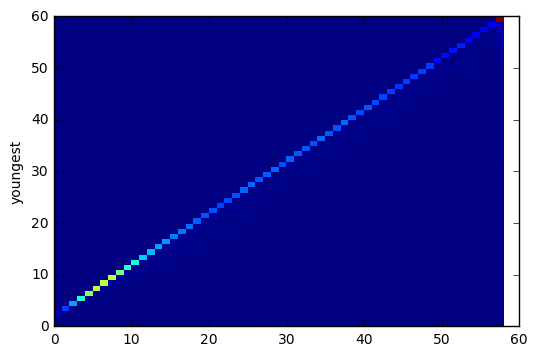

In [152]:
# Make a scatter plot to see if there is any cluster of oldest ages and youngest ages
#plt.scatter(quotes_bf_purchase.age_oldest, quotes_bf_purchase.age_youngest)
youngest_oldest_heatmap = quotes_bf_purchase[quotes_bf_purchase.group_size < 3].groupby(['age_youngest', 'age_oldest']).size().unstack() * 100
#youngest_oldest_heatmap = youngest_oldest_heatmap.fillna()
plt.pcolor(youngest_oldest_heatmap.fillna(0))
plt.ylabel('youngest')
plt.show()

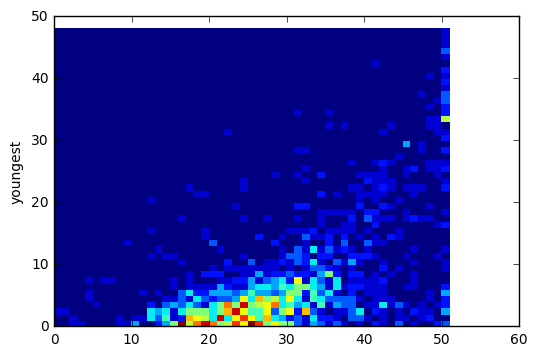

In [143]:
youngest_oldest_heatmap = quotes_bf_purchase[quotes_bf_purchase.group_size >= 3].groupby(['age_youngest', 'age_oldest']).size().unstack() * 100
#youngest_oldest_heatmap = youngest_oldest_heatmap.fillna()
plt.pcolor(youngest_oldest_heatmap.fillna(0))
plt.ylabel('youngest')
plt.show()

#### There is a significant clustering difference between groups of 3 people and above and those below 3 people. To be precise, there seems to be 3-means. It will be interesting if I could run a 3-means algorithm on this observation

In [176]:
def make_group_size_group(group_size):
    if group_size == 1:
        return 1
    elif group_size < 4:
        return 2
    else:
        return 3
quotes_bf_purchase['group_size_group'] = quotes_bf_purchase['group_size'].apply(make_group_size_group)

In [160]:
# Create the metrics 'family' and 'age_range'
quotes_bf_purchase['family'] = (quotes_bf_purchase.group_size >= 3)
quotes_bf_purchase['age_range'] = quotes_bf_purchase.age_oldest - quotes_bf_purchase.age_youngest

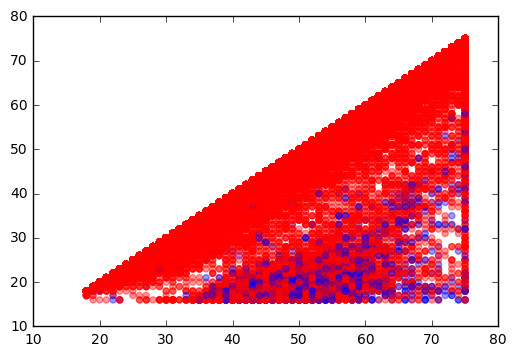

In [164]:
color_dict = {
    True: 'blue',
    False: 'red',
}
colors = quotes_bf_purchase['family'].apply(lambda x: color_dict[x])
alpha=0.4
plt.scatter(quotes_bf_purchase.age_oldest, quotes_bf_purchase.age_youngest, color=colors, alpha=alpha)
plt.show()

In [171]:
(groupedby_family_all_changed / groupedby_family_all) / overall_P_diff_quote

family
False    1.000656
True     0.955273
dtype: float64

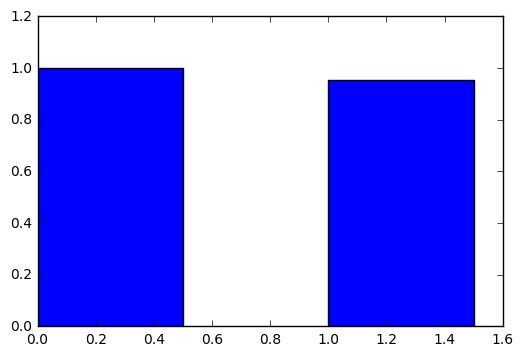

In [170]:
# Visualize the relationship between family-or-not and change-or-not
groupedby_family_all = quotes_bf_purchase.groupby('family').size()
groupedby_family_all_changed = quotes_bf_purchase[quotes_bf_purchase.different_quote == 1].groupby('family').size()
n_groups = len(groupedby_family_all.index)
index = np.arange(n_groups)
bar_width = 0.5
plt.bar(index, (groupedby_family_all_changed / groupedby_family_all) / overall_P_diff_quote, bar_width)
#plt.plot(groupedby_family_all_changed / groupedby_family_all, '.')
plt.show()

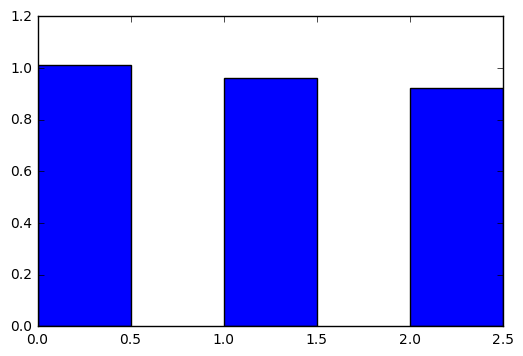

In [177]:
# Visualize the relationship between age range and different quote
groupedby_agediff = quotes_bf_purchase.groupby('group_size_group').size()
groupedby_agediff_changed = quotes_bf_purchase[quotes_bf_purchase.different_quote == 1].groupby('group_size_group').size()

n_groups = len(groupedby_agediff.index)
index = np.arange(n_groups)
bar_width = 0.5
plt.bar(index, (groupedby_agediff_changed / groupedby_agediff) / overall_P_diff_quote, bar_width)
#plt.plot(groupedby_family_all_changed / groupedby_family_all, '.')
plt.show()

In [178]:
(groupedby_agediff_changed / groupedby_agediff) / overall_P_diff_quote

group_size_group
1    1.011174
2    0.960072
3    0.924245
dtype: float64

### There does not seem to be a relationship between "age range" and different quotes. But the group size grouping provides a significant difference in terms of the probability of changing

In [ ]:
# Visualize the relationship between age range and different quote
groupedby_agediff = quotes_bf_purchase.groupby('group_size_group').size()
groupedby_agediff_changed = quotes_bf_purchase[quotes_bf_purchase.different_quote == 1].groupby('group_size_group').size()

n_groups = len(groupedby_agediff.index)
index = np.arange(n_groups)
bar_width = 0.5
plt.bar(index, (groupedby_agediff_changed / groupedby_agediff) / overall_P_diff_quote, bar_width)
#plt.plot(groupedby_family_all_changed / groupedby_family_all, '.')
plt.show()